In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

X, y = datasets.make_moons()

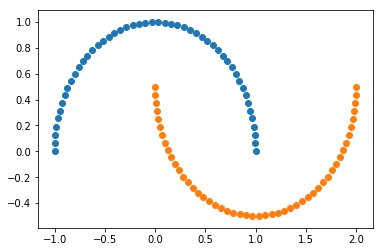

In [2]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [3]:
X,y = datasets.make_moons(noise=0.15,random_state=666)

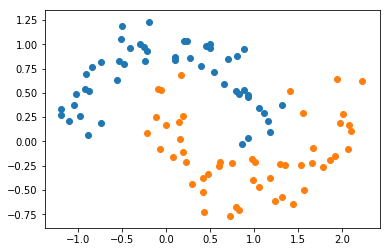

In [4]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

## 使用多项式特征的SVM

In [14]:
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

In [21]:
def poly_svc(degree,C=1.0):
    return Pipeline(
    [
        ('Poly',PolynomialFeatures(degree=degree)),
        ('ss',StandardScaler()),
        ('lsvc',LinearSVC(C=C))
    ])

In [22]:
psvc1 = poly_svc(2)
psvc1.fit(X,y)

Pipeline(memory=None,
     steps=[('Poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lsvc', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [42]:
from matplotlib.colors import ListedColormap

In [43]:
def plot_decision_boundary(model,axis):
    x0,x1 = np.meshgrid(
            np.linspace(axis[0],axis[1],int((axis[1] - axis[0]) * 100)).reshape(-1,1),
            np.linspace(axis[2],axis[3],int((axis[3] - axis[2]) * 100)).reshape(-1,1)
    )
    
    X_new = np.c_[x0.ravel(),x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

/A/develop/ide/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


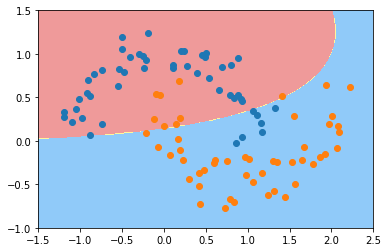

In [44]:
plot_decision_boundary(psvc1, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [64]:
def plot_decision_boundary_ful(model,plot_f,axis,degree,C=0.1):
    model.fit(X,y)
    plot_f(model, axis=[-1.5, 2.5, -1.0, 1.5])
    plt.scatter(X[y==0,0], X[y==0,1])
    plt.scatter(X[y==1,0], X[y==1,1])
    plt.show()

/A/develop/ide/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


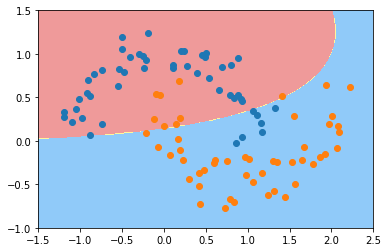

In [50]:
plot_decision_boundary_ful(plot_decision_boundary,[-1.5, 2.5, -1.0, 1.5],2)

/A/develop/ide/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


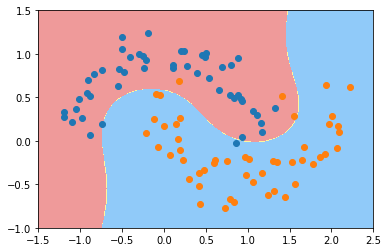

In [51]:
plot_decision_boundary_ful(plot_decision_boundary,[-1.5, 2.5, -1.0, 1.5],3)

In [52]:
from sklearn.svm import SVC

In [62]:
def PolynomialKernelSVC(degree, C=1.0):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("kernelSVC", SVC(kernel="poly", degree=degree, C=C))
    ])

/A/develop/ide/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


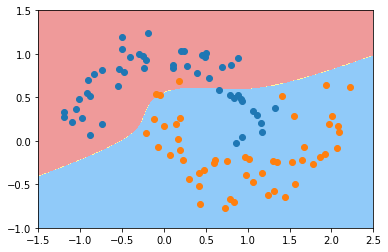

In [65]:
plot_decision_boundary_ful(PolynomialKernelSVC(3),plot_decision_boundary,[-1.5, 2.5, -1.0, 1.5],3)